Current working directory: d:\Personal Projects\TENx\week2\code\mobile-banking-review-analysis-week2\notebooks
Absolute path to data: d:\Personal Projects\TENx\week2\code\mobile-banking-review-analysis-week2\notebooks\data\all_banks_reviews_analyzed.csv


FileNotFoundError: [Errno 2] No such file or directory: 'notebooks/sentiment_by_bank.png'

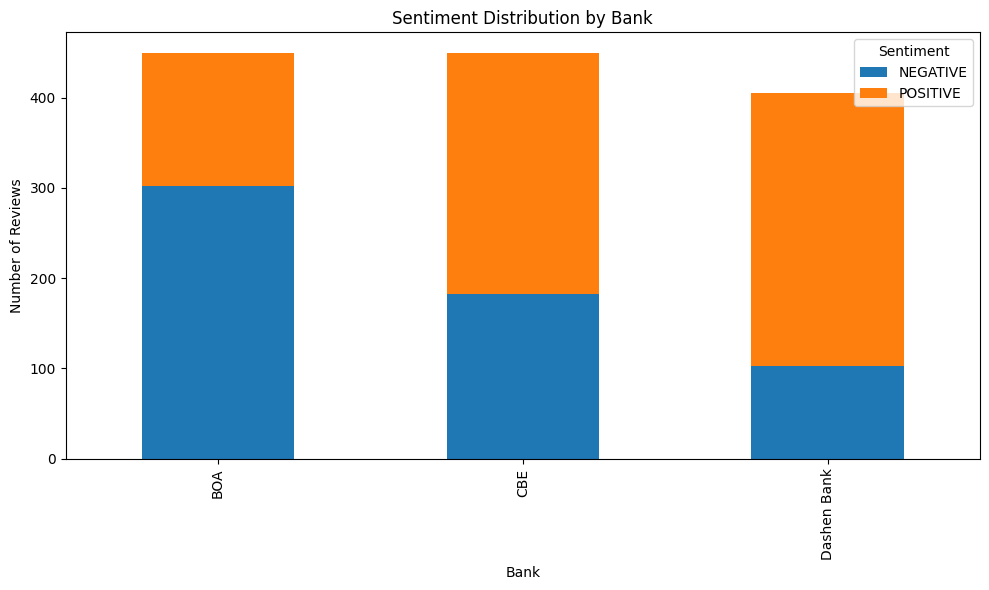

In [5]:
import sys
import os
print('Current working directory:', os.getcwd())
print('Absolute path to data:', os.path.abspath(os.path.join('data', 'all_banks_reviews_analyzed.csv')))
sys.path.append(os.path.abspath('..'))

from src.insights_utils import (
    load_data, get_sentiment_counts, plot_sentiment_bar,
    plot_rating_distribution, plot_keyword_cloud,
    get_top_themes, get_drivers_and_pain_points
)

# Load data
analyzed_df = load_data('../data/all_banks_reviews_analyzed.csv')

# 1. Sentiment Distribution by Bank
sentiment_counts = get_sentiment_counts(analyzed_df)
plot_sentiment_bar(sentiment_counts, save_path='notebooks/sentiment_by_bank.png')

# 2. Rating Distribution by Bank
plot_rating_distribution(analyzed_df, save_path='notebooks/rating_by_bank.png')

# 3. Keyword Cloud for each bank
for bank in analyzed_df['bank'].unique():
    plot_keyword_cloud(analyzed_df, bank=bank, save_path=f'notebooks/wordcloud_{bank}.png')

# 4. Top Themes
top_themes = get_top_themes(analyzed_df)
print('Top themes per bank:', top_themes)

# 5. Drivers and Pain Points
drivers_pain_points = get_drivers_and_pain_points(analyzed_df)
print('Drivers and pain points per bank:', drivers_pain_points)

# 6. Example: Recommendations (to be expanded in report)
for bank, vals in drivers_pain_points.items():
    print(f"\n{bank} Recommendations:")
    print(f"  Drivers: {[d[0] for d in vals['drivers']]}")
    print(f"  Pain Points: {[p[0] for p in vals['pain_points']]}")
    print(f"  Suggestion: Address '{vals['pain_points'][0][0]}' and enhance '{vals['drivers'][0][0]}' features.")